In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 12.,8.

import seaborn as sns
import pandas as pd
import wandb

pd.set_option('display.max_columns', None)

In [2]:
api = wandb.Api()
entity, project = "invariance-learners", "neurips2023experiments"  # set to your entity and project 
runs = api.runs(entity + "/" + project)

In [3]:
summary_list, config_list, name_list, tags, ids, states = [], [], [], [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
         if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

    tags.append(run.tags)

    ids.append(run.id)

    states.append(run.state)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list,
    "tags": tags,
    "id": ids,
    "state": states
    })

runs_df

,summary,config,name,tags,id,state
0,"{'val_reconstructions': {'size': 161343, '_typ...","{'α': 1, 'β': 10, 'γ': 1, 'hais': {'num_steps'...",royal-butterfly-2833,"[hais_sweep, seeds, test]",xu8mwy4d,finished
1,"{'train/z_kld': 41.64008331298828, 'learing_ra...","{'α': 1, 'β': 10, 'γ': 1, 'hais': {'num_steps'...",pretty-night-2829,"[hais_sweep, seeds, test]",x0rukt8r,finished
2,"{'val/ll': 897.2350463867188, 'best_val_iwlb':...","{'α': 1, 'β': 10, 'γ': 1, 'hais': {'num_steps'...",laced-flower-2829,"[hais_sweep, seeds, test]",2fmdgudf,finished
3,{'prior_samples': {'sha256': '441a173cf53166af...,"{'α': 1, 'β': 10, 'γ': 1, 'hais': {'num_steps'...",gallant-snow-2829,"[hais_sweep, seeds, test]",235prfk6,finished
4,"{'val/iwlb': 857.5218505859375, 'best_val_elbo...","{'α': 1, 'β': 10, 'γ': 1, 'hais': {'num_steps'...",ethereal-snow-2829,"[hais_sweep, seeds, test]",1k0bukun,finished
...,...,...,...,...,...,...
2828,"{'val/z_kld': 48.779335021972656, 'best_val_el...","{'α': 1, 'β': 10, 'γ': 1, 'seed': 1, 'model': ...",legendary-hill-4,"[VAE, angle_sweep, hidden, num_trn_sweep]",1o0kl4md,finished
2829,"{'train/elbo': 791.203369140625, 'best_val_ll'...","{'α': 1, 'β': 10, 'γ': 1, 'seed': 2, 'model': ...",wandering-fog-20,"[VAE, angle_sweep, hidden, num_trn_sweep]",1b9bni7k,finished
2830,"{'best_val_z_kld': 45.91422271728515, 'val/ll'...","{'α': 1, 'β': 10, 'γ': 1, 'seed': 0, 'model': ...",iconic-field-8,"[VAE, angle_sweep, hidden, num_trn_sweep]",1awux98q,finished
2831,"{'_wandb': {'runtime': 336}, '_timestamp': 168...","{'α': 1, 'β': 10, 'γ': 1, 'seed': 1, 'model': ...",kind-shape-6,"[VAE, angle_sweep, hidden, num_trn_sweep]",1adk4z59,finished


In [4]:
df_expanded = runs_df.join(pd.json_normalize(runs_df['summary'], record_prefix='summary.').add_prefix('summary.')).drop('summary', axis='columns')
df_expanded = df_expanded.join(pd.json_normalize(runs_df['config'], record_prefix='config').add_prefix('config.')).drop('config', axis='columns')

df_expanded.columns

Index(['name', 'tags', 'id', 'state', 'summary.β', 'summary.val/ll',
       'summary.val/z_kld', 'summary.best_val_iwlb', 'summary.best_val_loss',
       'summary.train/ll',
       ...
       'config.model.Η_given_Xhat.base.dropout_rate',
       'config.model.Η_given_Xhat.trunk.conv_dims',
       'config.model.Η_given_Xhat.trunk.dense_dims',
       'config.model.Η_given_Xhat.trunk.dropout_rate',
       'config.model.Η_given_Xhat.num_bins',
       'config.model.Η_given_Xhat.num_layers',
       'config.model.Η_given_Xhat.conditioner.hidden_dims',
       'config.model.Η_given_Xhat.conditioner.dropout_rate',
       'config.γ_schedule.alpha', 'config.γ_schedule.decay_steps'],
      dtype='object', length=155)

In [5]:
df_expanded

,name,tags,id,state,summary.β,summary.val/ll,summary.val/z_kld,summary.best_val_iwlb,summary.best_val_loss,summary.train/ll,summary.val/elbo,summary.train/elbo,summary.train/z_kld,summary.γ,summary.σ_vae,summary.hais_mll,summary.learing_rate,summary.best_val_elbo,summary._timestamp,summary.val/loss,summary.train/loss,summary.best_val_step,summary.best_val_z_kld,summary._step,summary.val/iwlb,summary.α,summary._runtime,summary.best_val_ll,summary.val_reconstructions.size,summary.val_reconstructions._type,summary.val_reconstructions.width,summary.val_reconstructions.format,summary.val_reconstructions.height,summary.val_reconstructions.sha256,summary.val_reconstructions.path,summary.best_prior_samples.sha256,summary.best_prior_samples.path,summary.best_prior_samples.size,summary.best_prior_samples._type,summary.best_prior_samples.width,summary.best_prior_samples.format,summary.best_prior_samples.height,summary._wandb.runtime,summary.prior_samples.path,summary.prior_samples.size,summary.prior_samples._type,summary.prior_samples.width,summary.prior_samples.format,summary.prior_samples.height,summary.prior_samples.sha256,summary.val/p_q_H_cent,summary.best_val_q_η_ce,summary.val/xhat_ll_unorm,summary.train/xhat_ll_unorm,summary.val/q_η_ce,summary.val/xhat_ll,summary.train/η_kld,summary.val/q_H_ent,summary.train/p_η_ce,summary.best_val_xhat_ll_unorm,summary.σ,summary.val/η_kld,summary.best_val_q_H_ent,summary.best_val_p_q_H_cent,summary.train/q_η_ce,summary.best_val_p_η_ce,summary.train/xhat_ll,summary.train/ll_unorm,summary.best_val_η_kld,summary.best_val_xhat_ll,summary.train/p_q_H_cent,summary.best_val_ll_unorm,summary.val/p_η_ce,summary.val/ll_unorm,summary.train/q_H_ent,config.α,config.β,config.γ,config.seed,config.dataset,config.pp_eval,config.pp_train,config.run_hais,config.run_iwlb,config.val_split,config.batch_size,config.eval_every,config.model_name,config.optim_name,config.total_steps,config.train_split,config.learning_rate,config.batch_size_eval,config.lr_schedule_name,config.β_schedule_name,config.repeat_after_batch,config.shuffle_buffer_size,config.hais.num_steps,config.hais.step_size,config.hais.num_chains,config.hais.num_leapfrog_steps,config.iwlb.num_samples,config.model.X_given_Z.conv_dims,config.model.X_given_Z.dense_dims,config.model.X_given_Z.max_2strides,config.model.Z_given_X.conv_dims,config.model.Z_given_X.dense_dims,config.model.Z_given_X.max_2strides,config.model.latent_dim,config.optim.weight_decay,config.lr_schedule.end_value,config.lr_schedule.peak_value,config.lr_schedule.decay_steps,config.lr_schedule.warmup_steps,config.β_schedule.alpha,config.β_schedule.decay_steps,config.optim,config.reset_step,config.lr_schedule,config.partition_fn,config.β_end_value,config.γ_end_value,config.partition_names,config.β_schedule_half,config.γ_schedule_half,config.γ_schedule_name,config.lr_schedule_halfs,config.model.bounds,config.model.offset,config.model.Η_given_X.base.conv_dims,config.model.Η_given_X.base.dense_dims,config.model.Η_given_X.base.dropout_rate,config.model.Η_given_X.trunk.conv_dims,config.model.Η_given_X.trunk.dense_dims,config.model.Η_given_X.trunk.dropout_rate,config.model.Η_given_X.num_bins,config.model.Η_given_X.num_layers,config.model.Η_given_X.conditioner.hidden_dims,config.model.Η_given_X.conditioner.dropout_rate,config.model.Xhat_given_Z.conv_dims,config.model.Xhat_given_Z.dense_dims,config.model.Z_given_Xhat.conv_dims,config.model.Z_given_Xhat.dense_dims,config.model.Η_given_Xhat.base.conv_dims,config.model.Η_given_Xhat.base.dense_dims,config.model.Η_given_Xhat.base.dropout_rate,config.model.Η_given_Xhat.trunk.conv_dims,config.model.Η_given_Xhat.trunk.dense_dims,config.model.Η_given_Xhat.trunk.dropout_rate,config.model.Η_given_Xhat.num_bins,config.model.Η_given_Xhat.num_layers,config.model.Η_given_Xhat.conditioner.hidden_dims,config.model.Η_given_Xhat.conditioner.dropout_rate,config.γ_schedule.alpha,config.γ_schedule.decay_steps
0,royal-butterfly-2833,"[hais_sweep, seeds, test]",xu8mwy4d,finish

In [6]:
# take only completed runs
df_filtered = df_expanded[df_expanded['state'] == 'finished']

# take only runs with certain tags
tags_to_keep = ['hais_sweep']
df_filtered = df_filtered[df_filtered['tags'].apply(lambda x: all(tag in x for tag in tags_to_keep))]

# take only runs without certain tags
tags_to_remove = ['hidden']
df_filtered = df_filtered[~df_filtered['tags'].apply(lambda x: any(tag in x for tag in tags_to_remove))]


df_filtered

,name,tags,id,state,summary.β,summary.val/ll,summary.val/z_kld,summary.best_val_iwlb,summary.best_val_loss,summary.train/ll,summary.val/elbo,summary.train/elbo,summary.train/z_kld,summary.γ,summary.σ_vae,summary.hais_mll,summary.learing_rate,summary.best_val_elbo,summary._timestamp,summary.val/loss,summary.train/loss,summary.best_val_step,summary.best_val_z_kld,summary._step,summary.val/iwlb,summary.α,summary._runtime,summary.best_val_ll,summary.val_reconstructions.size,summary.val_reconstructions._type,summary.val_reconstructions.width,summary.val_reconstructions.format,summary.val_reconstructions.height,summary.val_reconstructions.sha256,summary.val_reconstructions.path,summary.best_prior_samples.sha256,summary.best_prior_samples.path,summary.best_prior_samples.size,summary.best_prior_samples._type,summary.best_prior_samples.width,summary.best_prior_samples.format,summary.best_prior_samples.height,summary._wandb.runtime,summary.prior_samples.path,summary.prior_samples.size,summary.prior_samples._type,summary.prior_samples.width,summary.prior_samples.format,summary.prior_samples.height,summary.prior_samples.sha256,summary.val/p_q_H_cent,summary.best_val_q_η_ce,summary.val/xhat_ll_unorm,summary.train/xhat_ll_unorm,summary.val/q_η_ce,summary.val/xhat_ll,summary.train/η_kld,summary.val/q_H_ent,summary.train/p_η_ce,summary.best_val_xhat_ll_unorm,summary.σ,summary.val/η_kld,summary.best_val_q_H_ent,summary.best_val_p_q_H_cent,summary.train/q_η_ce,summary.best_val_p_η_ce,summary.train/xhat_ll,summary.train/ll_unorm,summary.best_val_η_kld,summary.best_val_xhat_ll,summary.train/p_q_H_cent,summary.best_val_ll_unorm,summary.val/p_η_ce,summary.val/ll_unorm,summary.train/q_H_ent,config.α,config.β,config.γ,config.seed,config.dataset,config.pp_eval,config.pp_train,config.run_hais,config.run_iwlb,config.val_split,config.batch_size,config.eval_every,config.model_name,config.optim_name,config.total_steps,config.train_split,config.learning_rate,config.batch_size_eval,config.lr_schedule_name,config.β_schedule_name,config.repeat_after_batch,config.shuffle_buffer_size,config.hais.num_steps,config.hais.step_size,config.hais.num_chains,config.hais.num_leapfrog_steps,config.iwlb.num_samples,config.model.X_given_Z.conv_dims,config.model.X_given_Z.dense_dims,config.model.X_given_Z.max_2strides,config.model.Z_given_X.conv_dims,config.model.Z_given_X.dense_dims,config.model.Z_given_X.max_2strides,config.model.latent_dim,config.optim.weight_decay,config.lr_schedule.end_value,config.lr_schedule.peak_value,config.lr_schedule.decay_steps,config.lr_schedule.warmup_steps,config.β_schedule.alpha,config.β_schedule.decay_steps,config.optim,config.reset_step,config.lr_schedule,config.partition_fn,config.β_end_value,config.γ_end_value,config.partition_names,config.β_schedule_half,config.γ_schedule_half,config.γ_schedule_name,config.lr_schedule_halfs,config.model.bounds,config.model.offset,config.model.Η_given_X.base.conv_dims,config.model.Η_given_X.base.dense_dims,config.model.Η_given_X.base.dropout_rate,config.model.Η_given_X.trunk.conv_dims,config.model.Η_given_X.trunk.dense_dims,config.model.Η_given_X.trunk.dropout_rate,config.model.Η_given_X.num_bins,config.model.Η_given_X.num_layers,config.model.Η_given_X.conditioner.hidden_dims,config.model.Η_given_X.conditioner.dropout_rate,config.model.Xhat_given_Z.conv_dims,config.model.Xhat_given_Z.dense_dims,config.model.Z_given_Xhat.conv_dims,config.model.Z_given_Xhat.dense_dims,config.model.Η_given_Xhat.base.conv_dims,config.model.Η_given_Xhat.base.dense_dims,config.model.Η_given_Xhat.base.dropout_rate,config.model.Η_given_Xhat.trunk.conv_dims,config.model.Η_given_Xhat.trunk.dense_dims,config.model.Η_given_Xhat.trunk.dropout_rate,config.model.Η_given_Xhat.num_bins,config.model.Η_given_Xhat.num_layers,config.model.Η_given_Xhat.conditioner.hidden_dims,config.model.Η_given_Xhat.conditioner.dropout_rate,config.γ_schedule.alpha,config.γ_schedule.decay_steps
0,royal-butterfly-2833,"[hais_sweep, seeds, test]",xu8mwy4d,finish

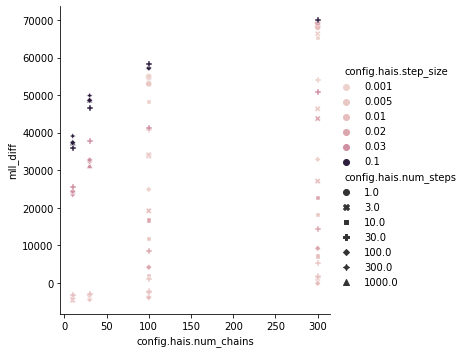

In [12]:
tags_to_remove = ['seeds']
plot_df = df_filtered[~df_filtered['tags'].apply(lambda x: any(tag in x for tag in tags_to_remove))]

plot_df = plot_df[
    ['config.hais.num_chains', 'config.hais.num_steps', 'config.hais.step_size', 'summary.hais_mll', 'summary.best_val_elbo', 'summary.best_val_iwlb']
]

plot_df['mll_diff'] = (plot_df['summary.hais_mll'] - plot_df['summary.best_val_iwlb'])

g = sns.relplot(
    y="mll_diff", hue="config.hais.step_size", style="config.hais.num_steps", x="config.hais.num_chains",
    markers=True,
    data=plot_df
)
plt.show()

In [15]:
plot_df.sort_values(by='mll_diff', ascending=True).query('mll_diff > 0').head(10)

,config.hais.num_chains,config.hais.num_steps,config.hais.step_size,summary.hais_mll,summary.best_val_elbo,summary.best_val_iwlb,mll_diff
104,300.0,100.0,0.005,1732.626831,871.394043,898.562256,834.064575
89,100.0,30.0,0.005,1855.034058,875.555420,902.360718,952.673340
123,300.0,30.0,0.010,2545.593018,836.259644,861.890869,1683.702148
87,100.0,10.0,0.010,2679.466064,873.302429,900.583923,1778.882141
110,300.0,30.0,0.010,2783.929443,860.927368,887.964966,1895.964478
83,100.0,100.0,0.020,5073.360840,868.733826,894.065063,4179.295776
113,300.0,30.0,0.005,6281.479004,852.772461,879.861633,5401.617371
115,300.0,10.0,0.010,7938.270996,852.355469,878.957336,7059.313660
85,100.0,30.0,0.020,9362.480469,884.729431,910.332825,8452.147644
107,300.0,100.0,0.020,10101.750000,854.106812,880.325745,9221.424255


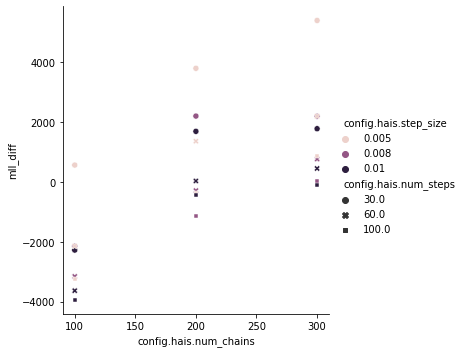

In [17]:
tags_to_keep = ['seeds']
plot_df = df_filtered[df_filtered['tags'].apply(lambda x: any(tag in x for tag in tags_to_keep))]

plot_df = plot_df[
    ['config.hais.num_chains', 'config.hais.num_steps', 'config.hais.step_size',
     'summary.hais_mll', 'summary.best_val_elbo', 'summary.best_val_iwlb', 'config.seed']
]

plot_df['mll_diff'] = (plot_df['summary.hais_mll'] - plot_df['summary.best_val_iwlb'])

plot_df = plot_df.groupby(['config.hais.num_chains', 'config.hais.num_steps', 'config.hais.step_size']).mean().reset_index()

g = sns.relplot(
    y="mll_diff", hue="config.hais.step_size", style="config.hais.num_steps", x="config.hais.num_chains",
    markers=True,
    data=plot_df
)
plt.show()

In [18]:
plot_df.sort_values(by='mll_diff', ascending=True).query('mll_diff > 0').head(10)

,config.hais.num_chains,config.hais.num_steps,config.hais.step_size,summary.hais_mll,summary.best_val_elbo,summary.best_val_iwlb,config.seed,mll_diff
25,300.0,100.0,0.008,914.229045,865.301737,892.382304,1.0,21.846741
14,200.0,60.0,0.010,927.141335,863.710571,890.365051,1.0,36.776283
23,300.0,60.0,0.010,1345.718709,864.739705,891.804952,1.0,453.913757
0,100.0,30.0,0.005,1473.275594,878.048828,905.228271,1.0,568.047323
22,300.0,60.0,0.008,1651.354940,854.977763,882.220235,1.0,769.134705
24,300.0,100.0,0.005,1743.727905,852.982198,880.198975,1.0,863.528931
12,200.0,60.0,0.005,2225.443481,832.759277,858.716654,1.0,1366.726827
11,200.0,30.0,0.010,2578.823039,858.670654,884.997965,1.0,1693.825073
20,300.0,30.0,0.010,2670.877848,860.786438,887.876383,1.0,1783.001465
19,300.0,30.0,0.008,3084.280111,858.203308,885.038188,1.0,2199.241923


In [22]:
tags_to_keep = ['seeds']
plot_df = df_filtered[df_filtered['tags'].apply(lambda x: any(tag in x for tag in tags_to_keep))]

plot_df = plot_df[
    ['config.hais.num_chains', 'config.hais.num_steps', 'config.hais.step_size',
     'summary.hais_mll', 'summary.best_val_elbo', 'summary.best_val_iwlb', 'config.seed']
]

plot_df['abs_mll_diff'] = (plot_df['summary.hais_mll'] - plot_df['summary.best_val_iwlb']).abs()

plot_df[(plot_df['config.hais.num_chains'] == 300) & (plot_df['config.hais.num_steps'] == 100) & (plot_df['config.hais.step_size'] == 0.008)]

,config.hais.num_chains,config.hais.num_steps,config.hais.step_size,summary.hais_mll,summary.best_val_elbo,summary.best_val_iwlb,config.seed,abs_mll_diff
55,300.0,100.0,0.008,881.726929,849.624512,873.842224,2,7.884705
70,300.0,100.0,0.008,970.804260,870.915039,897.919067,0,72.885193
74,300.0,100.0,0.008,890.155945,875.365662,905.385620,1,15.229675
